### This code generates the calibrated energy, redshift, fluence and DM distributions for the SSH and CDT models, and plots the predictions for OpTel.

In [1]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
from legend_mod import *
from IPython.display import display, Math

In [2]:
sol_rad = 6.957e10 #cm
c = 299792458 * 100 #cm/s
parsec = 3.08568e18 #cm
jansky = 1e-23

In [3]:
nu_obs = 6e8 # Hz
nu0_com = 6e8
dz = 0.01

# Define array for DM and F array binning
x_param = [np.linspace(0,8,801), np.logspace(2.0,np.log10(5000),27), np.logspace(0,np.log10(1500),41)]
x_points = [np.arange(0.005,8.0,dz), 10**(np.log10(x_param[1][0:-1]) + np.diff(np.log10(x_param[1]))/2), 10**(np.log10(x_param[2][:-1]) + np.diff(np.log10(x_param[2]))/2)]

cat1 = pd.read_csv("files/chimefrbcutcat_94.csv")
dms = cat1['dm_fitb']
cat2 = pd.read_csv('files/basecat1_catalog.csv')
cat1_idx, cat2_idx = utils.match_cats(cat1, cat2)

fluences = cat2['fluence'][cat2_idx].values
fluence_err = cat2['fluence_err'][cat2_idx].values
dms_cat2 = dms[cat1_idx].values
sbs, of_smooth = utils.observation_function(x_param)

z = np.arange(0.005, 14, dz)

c:\Users\Om\Box\FRB Research\frb-cosmic-evol\utils.py:16: RuntimeWarning: divide by zero encountered in log10
  of_det = np.log10(of_det[7:-7,:])


In [4]:
zevol_file = np.load("data/phi_zevol_agEf.npz")
zevol_file_delay = np.load("data/phi_zevol_agEt.npz")
inds = zevol_file['inds']
phi_samples = zevol_file['phi_samples']
curves1 = zevol_file['zevol_5Jyms']
curves2 = zevol_file['zevol_1Jyms']
curves3 = zevol_file['zevol_14mJyms']
Enu_dist = zevol_file['Enu_dist']
flu_curve = zevol_file['flu_curve']
dm_curve = zevol_file['dm_curve']

inds_delay = zevol_file_delay['inds']
phi_samples_delay = zevol_file_delay['phi_samples']
curves1_delay = zevol_file_delay['zevol_5Jyms']
curves2_delay = zevol_file_delay['zevol_1Jyms']
curves3_delay = zevol_file_delay['zevol_14mJyms']
Enu_dist_delay = zevol_file_delay['Enu_dist']
flu_curve_delay = zevol_file_delay['flu_curve']
dm_curve_delay = zevol_file_delay['dm_curve']

In [5]:
totrate1 = np.zeros_like(curves1)
totrate2 = np.zeros_like(curves2)
totrate3 = np.zeros_like(curves3)
flurate = np.zeros_like(flu_curve)
dmrate = np.zeros_like(dm_curve)
for i in range(10000):
    totrate1[i] = phi_samples[i] * curves1[i]
    totrate2[i] = phi_samples[i] * curves2[i]
    totrate3[i] = phi_samples[i] * curves3[i]
    Enu_dist[i] = phi_samples[i] * Enu_dist[i] * 1e9
    flurate[i] = phi_samples[i] * flu_curve[i]
    dmrate[i] = phi_samples[i] * dm_curve[i]

range1 = np.percentile(totrate1, [2.5, 16, 50, 84, 97.5], axis=0)
range2 = np.percentile(totrate2, [2.5, 16, 50, 84, 97.5], axis=0)
range3 = np.percentile(totrate3, [2.5, 16, 50, 84, 97.5], axis=0)
Enu_distrange = np.percentile(Enu_dist, [2.5, 16, 50, 84, 97.5], axis=0)
flurange = np.percentile(flurate, [2.5, 16, 50, 84, 97.5], axis=0)
dmrange = np.percentile(dmrate, [2.5, 16, 50, 84, 97.5], axis=0)

cumrate1 = np.cumsum(totrate1[:,::-1], axis=1)[:,::-1]
cumrate2 = np.cumsum(totrate2[:,::-1], axis=1)[:,::-1]
cumrate3 = np.cumsum(totrate3[:,::-1], axis=1)[:,::-1]
cumrange1 = np.percentile(cumrate1, [2.5, 16, 50, 84, 97.5], axis=0)
cumrange2 = np.percentile(cumrate2, [2.5, 16, 50, 84, 97.5], axis=0)
cumrange3 = np.percentile(cumrate3, [2.5, 16, 50, 84, 97.5], axis=0)
flucum = np.cumsum(flurate, axis=1)
dmcum = np.cumsum(dmrate, axis=1)
for i in range(10000):
    flucum[i] = flucum[i] / flucum[i,-1]
    dmcum[i] = dmcum[i] / dmcum[i,-1]
flucumrange = np.percentile(flucum, [2.5, 16, 50, 84, 97.5], axis=0)
dmcumrange = np.percentile(dmcum, [2.5, 16, 50, 84, 97.5], axis=0)

In [6]:
totrate1_delay = np.zeros_like(curves1_delay)
totrate2_delay = np.zeros_like(curves2_delay)
totrate3_delay = np.zeros_like(curves3_delay)
flurate_delay = np.zeros_like(flu_curve_delay)
dmrate_delay = np.zeros_like(dm_curve_delay)
for i in range(10000):
    totrate1_delay[i] = phi_samples_delay[i] * curves1_delay[i]
    totrate2_delay[i] = phi_samples_delay[i] * curves2_delay[i]
    totrate3_delay[i] = phi_samples_delay[i] * curves3_delay[i]
    Enu_dist_delay[i] = phi_samples_delay[i] * Enu_dist_delay[i] * 1e9
    flurate_delay[i] = phi_samples_delay[i] * flu_curve_delay[i]
    dmrate_delay[i] = phi_samples_delay[i] * dm_curve_delay[i]

range1_delay = np.percentile(totrate1_delay, [2.5, 16, 50, 84, 97.5], axis=0)
range2_delay = np.percentile(totrate2_delay, [2.5, 16, 50, 84, 97.5], axis=0)
range3_delay = np.percentile(totrate3_delay, [2.5, 16, 50, 84, 97.5], axis=0)
Enu_distrange_delay = np.percentile(Enu_dist_delay, [2.5, 16, 50, 84, 97.5], axis=0)
flurange_delay = np.percentile(flurate_delay, [2.5, 16, 50, 84, 97.5], axis=0)
dmrange_delay = np.percentile(dmrate_delay, [2.5, 16, 50, 84, 97.5], axis=0)

cumrate1_delay = np.cumsum(totrate1_delay[:,::-1], axis=1)[:,::-1]
cumrate2_delay = np.cumsum(totrate2_delay[:,::-1], axis=1)[:,::-1]
cumrate3_delay = np.cumsum(totrate3_delay[:,::-1], axis=1)[:,::-1]
cumrange1_delay = np.percentile(cumrate1_delay, [2.5, 16, 50, 84, 97.5], axis=0)
cumrange2_delay = np.percentile(cumrate2_delay, [2.5, 16, 50, 84, 97.5], axis=0)
cumrange3_delay = np.percentile(cumrate3_delay, [2.5, 16, 50, 84, 97.5], axis=0)
flucum_delay = np.cumsum(flurate_delay, axis=1)
dmcum_delay = np.cumsum(dmrate_delay, axis=1)
for i in range(10000):
    flucum_delay[i] = flucum_delay[i] / flucum_delay[i,-1]
    dmcum_delay[i] = dmcum_delay[i] / dmcum_delay[i,-1]
flucumrange_delay = np.percentile(flucum_delay, [2.5, 16, 50, 84, 97.5], axis=0)
dmcumrange_delay = np.percentile(dmcum_delay, [2.5, 16, 50, 84, 97.5], axis=0)

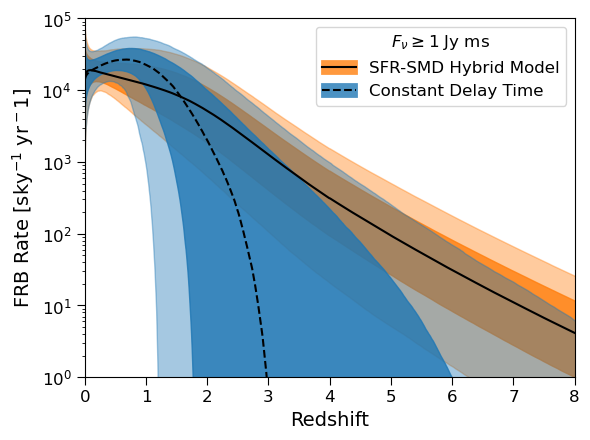

In [7]:
fig, ax = plt.subplots(1,1, figsize=(6,4.5))
ax.fill_between(z, range2[1], range2[3], color='C1', alpha=0.8)
ax.fill_between(z, range2[0], range2[4], color='C1', alpha=0.4)
ax.fill_between(z, range2_delay[1], range2_delay[3], color='C0', alpha=0.8)
ax.fill_between(z, range2_delay[0], range2_delay[4], color='C0', alpha=0.4)

ax.plot(z, range2[2], color='k', label='SFR-SMD Hybrid Model')
ax.plot(z, range2_delay[2], color='k', linestyle='--', label='Constant Delay Time')
# print(handles)
ax.set_xlim([0,8])
ax.set_ylim([1, 1e5])
ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel("Redshift", fontsize=14)
ax.set_ylabel(r"FRB Rate [sky$^{-1}$ yr${^-1}$]", fontsize=14)
ax.tick_params(axis='both', which='major', length=6, labelsize=12)
ax.legend([0, 1], ["SFR-SMD Hybrid Model", "Constant Delay Time"],
           handler_map={
                0: PatchObject((np.array(cc.to_rgb('C1'))*0.8 + bg*0.2), line_flag=True, line_color='k', dashed=False),
                1: PatchObject((np.array(cc.to_rgb('C0'))*0.8 + bg*0.2), line_flag=True, line_color='k', dashed=True),
            }, fontsize=12, title=r"$F_{\nu} \geq 1$ Jy ms", title_fontsize='12')
plt.tight_layout()
plt.show()

### Generate Figure 5b

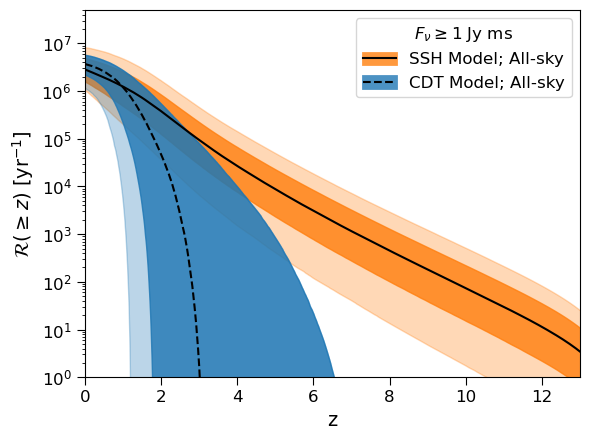

In [8]:
fig, ax = plt.subplots(1,1, figsize=(6,4.5))
ax.fill_between(z, cumrange2[1], cumrange2[3], color='C1', alpha=0.8)
ax.fill_between(z, cumrange2[0], cumrange2[4], color='C1', alpha=0.3)
ax.fill_between(z, cumrange2_delay[1], cumrange2_delay[3], color='C0', alpha=0.8)
ax.fill_between(z, cumrange2_delay[0], cumrange2_delay[3], color='C0', alpha=0.3)

ax.plot(z, cumrange2[2], color='k', label='SFR-SMD Hybrid Model')
ax.plot(z, cumrange2_delay[2], color='k', linestyle='--', label='Constant Delay Time')

# print(handles)
ax.set_xlim([0,13])
ax.set_ylim([1, 5e7])
ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel("z", fontsize=14)
ax.set_ylabel(r"$\mathcal{R}(\geq z)$ [yr$^{-1}$]", fontsize=14)
ax.tick_params(axis='both', which='major', length=6, labelsize=12)
ax.legend([0, 1], ["SSH Model; All-sky", "CDT Model; All-sky"],
           handler_map={
                0: PatchObject((np.array(cc.to_rgb('C1'))*0.8 + bg*0.2), line_flag=True, line_color='k', dashed=False),
                1: PatchObject((np.array(cc.to_rgb('C0'))*0.8 + bg*0.2), line_flag=True, line_color='k', dashed=True),
                2: LineObject(linestyle='-.'),
            }, fontsize=12, title=r"$F_{\nu} \geq 1$ Jy ms", title_fontsize='12', loc=1)
plt.tight_layout()
plt.show()

In [9]:
def sky_frac(nu, D):
    """"
    For parabolic reflectors: FoV = 1.13 * (lambda/D)**2 radians
    Returns FoV as a fraction of the sky area
    D in cm
    nu in Hz
    """
    return 1.13 * (c/nu/D)**2 / (4*np.pi)

def detection_threshold(SEFD, efficiency=0.9, npol=2, bandwidth=3e8, t_obs=1e-3):
    """
    Returns the detection threshold in Jy (For t_obs = 1e-3 s, the output can be considered as in Jy ms)
    SEFD in Jy, npol, efficiency in fraction, bandwidth in Hz, t_obs in seconds
    Detection threshold = 10 * sensitivity (where threshold is assumed to be 10 sigma)
    """
    return 10 * SEFD / efficiency / np.sqrt(npol * bandwidth * t_obs)

#### CHORD: https://arxiv.org/pdf/1911.01777 Vanderlinde et al 2019
#### DSA-2000: https://arxiv.org/pdf/2206.14310 Connor and Ravi 2022
#### SKA1mid: https://arxiv.org/pdf/1912.12699 Braun et al. 2019

In [10]:
chord_sky_frac = sky_frac(6e8, 600) # * 4*np.pi * (180/np.pi)**2
print("CHORD sky fraction = {:.3e}".format(chord_sky_frac))
# dsa2000_sky_frac = 10.6 * (np.pi/180)**2 / (4*np.pi)
dsa2000_sky_frac = 1e6 * sky_frac(8.5e8, 5e5)#18.458 * (np.pi/180)**2 / (4*np.pi)
print("DSA2000 sky fraction = {:.3e}".format(dsa2000_sky_frac))
ska1mid_sky_frac = sky_frac(6e8, 1500)
print("SKA1-MID sky fraction = {:.3e}".format(ska1mid_sky_frac))
ska1low_sky_frac = 1.4884*(c/2e8/3500)**2 / (4*np.pi) #sky_frac(2e8, 3100)
print("SKA1-Low sky fraction @ 200 MHz = {:.3e}".format(ska1low_sky_frac))
ska2aamid_sky_frac = 200 * (600/1000)**(-2) * (np.pi/180)**2 / (4*np.pi)
print("SKA2-AAMID sky fraction = {:.3e}".format(ska2aamid_sky_frac))
burstt_sky_frac = 0.24
print("BurstT sky fraction = {:.3e}".format(burstt_sky_frac))
optimus_sky_frac = 0.005
print("OpTel sky fraction = {:.3e}".format(optimus_sky_frac))

CHORD sky fraction = 6.236e-04
DSA2000 sky fraction = 4.474e-04
SKA1-MID sky fraction = 9.978e-05
SKA1-Low sky fraction @ 200 MHz = 2.172e-04
SKA2-AAMID sky fraction = 1.347e-02
BurstT sky fraction = 2.400e-01
OpTel sky fraction = 5.000e-03


In [11]:
# SKA1-LOW test anticipated FoV using standard Rayleigh criterion
1.4884*(c/3e8/3500)**2 * (180/np.pi)**2 * 60 * 60, np.sqrt(14339), 1.4884*(c/2e8/3500)**2 / (4*np.pi)

(14339.375402395213, 119.74556359214316, 0.0002172476679264612)

In [12]:
# Telescopes operating at 600 MHz
chord_detect = detection_threshold(9)
print("CHORD detection threshold = {:.3e} Jy ms".format(chord_detect))
# For SKA1-mid, we assume a typical 2km baseline, instead of maximum baseline of 20km for getting typical survey speeds
# private comms: Robert Braun
ska1mid_detect = detection_threshold(1.7)
print("SKA1-MID detection threshold = {:.3e} Jy ms".format(ska1mid_detect))

ska1low_detect = detection_threshold(9) # For a 2km baseline to optimize the sky coverage for 50000 tied array beams
print("SKA1-Low detection threshold = {:.3e} Jy ms".format(ska1low_detect))
# SKA2-AAMID has 1 mJy ms sensitivity for 100 MHz bandwidth
ska2aamid_detect = detection_threshold(0.4)
print("SKA2-AAMID detection threshold = {:.3e} Jy ms".format(ska2aamid_detect))

burstt_detect = detection_threshold(600, npol=1)
print("BurstT detection threshold = {:.3e} Jy ms".format(burstt_detect))

optimus_detect = detection_threshold(1)
print("OpTel detection threshold = {:.4e} Jy ms".format(optimus_detect))

# At 850 MHz
dsa2000_detect = detection_threshold(6)
print("DSA2000 detection threshold = {:.3e} Jy ms".format(dsa2000_detect))

CHORD detection threshold = 1.291e-01 Jy ms
SKA1-MID detection threshold = 2.439e-02 Jy ms
SKA1-Low detection threshold = 1.291e-01 Jy ms
SKA2-AAMID detection threshold = 5.738e-03 Jy ms
BurstT detection threshold = 1.217e+01 Jy ms
OpTel detection threshold = 1.4344e-02 Jy ms
DSA2000 detection threshold = 8.607e-02 Jy ms


### Generate the OpTel redshift evolution of Figure 6

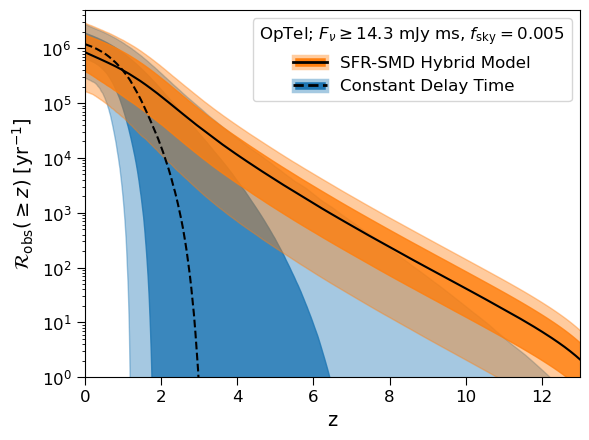

In [13]:
fig, ax = plt.subplots(1,1, figsize=(6,4.5))
z = np.arange(0.005, 14, dz)

ax.fill_between(z, cumrange3_delay[1]*optimus_sky_frac, cumrange3_delay[3]*optimus_sky_frac, color='C0', alpha=0.8)
ax.fill_between(z, cumrange3_delay[0]*optimus_sky_frac, cumrange3_delay[4]*optimus_sky_frac, color='C0', alpha=0.4)
ax.fill_between(z, cumrange3[1]*optimus_sky_frac, cumrange3[3]*optimus_sky_frac, color='C1', alpha=0.8)
ax.fill_between(z, cumrange3[0]*optimus_sky_frac, cumrange3[4]*optimus_sky_frac, color='C1', alpha=0.4)

ax.plot(z, cumrange3_delay[2]*optimus_sky_frac, color='k', linestyle='--', label='Constant Delay Time')
ax.plot(z, cumrange3[2]*optimus_sky_frac, color='k', label='SFR-SMD Hybrid Model')
ax.set_xlim([0,13])
ax.set_ylim([1, 5e6])
ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel("z", fontsize=14)
ax.set_ylabel(r"$\mathcal{R}_{\rm obs}(\geq z)$ [yr$^{-1}$]", fontsize=14)
ax.tick_params(axis='both', which='major', length=6, labelsize=12)
# legend1 = ax.legend([sfrsmdline, cdtline], ["SFR-SMD Hybrid", "Constant Delay Time"], handleheight=1, fontsize=10, loc=1, title="Line style", title_fontsize=10)
ax.legend([0,1],[r"SFR-SMD Hybrid Model", r"Constant Delay Time"],
           handler_map={
                0: LegendObject('C1', (np.array(cc.to_rgb('C1'))*0.4 + bg*0.6), line_flag=True, line_color='k'),
                1: LegendObject('C0', (np.array(cc.to_rgb('C0'))*0.4 + bg*0.6), line_flag=True, line_color='k', dashed=True),
            }, handlelength=2, fontsize=12, title=r"OpTel; $F_{\nu} \geq 14.3$ mJy ms, $f_{\rm sky} = 0.005$", title_fontsize='12')
plt.tight_layout()
plt.show()

### Plot Figure 5a (except the energy distribution of Shin+23)

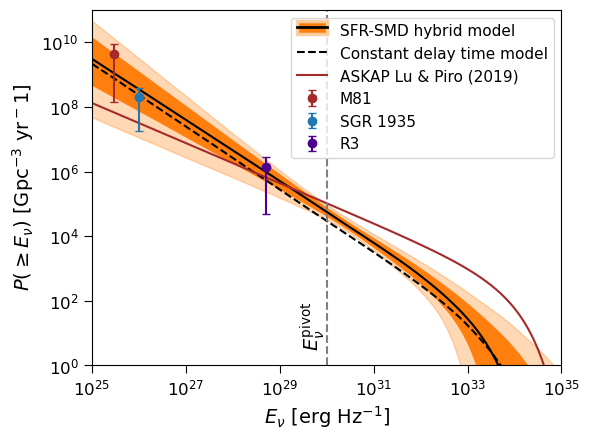

In [14]:
def askap_Edist(E_nu0, volnorm, E_max, gamma):
    def integrand(E_nu):
        return volnorm/E_max * (E_nu/E_max)**gamma * np.exp(-E_nu/E_max)
    
    num = np.zeros_like(E_nu0)
    for i in range(E_nu0.shape[0]):
        if E_nu0[i] >= 1e21 and E_nu0[i] < 1e36: # erg Hz^-1
            lower = np.log10(E_nu0[i])
            Earray = 10**np.arange(lower, 36.001, 0.005)
            for j in range(len(Earray)-1):
                num[i] += 0.5 * (integrand(Earray[j]) + integrand(Earray[j+1])) * (Earray[j+1] - Earray[j])
    return volnorm * num

fig, ax = plt.subplots(1,1, figsize=(6,4.5))
Enu = np.logspace(25, 36, 111)
ax.fill_between(Enu, Enu_distrange[1], Enu_distrange[3], color='C1', alpha=1)
ax.fill_between(Enu, Enu_distrange[0], Enu_distrange[4], color='C1', alpha=0.3)
ax.plot(Enu, Enu_distrange[2], color='k', label="SFR-SMD hybrid model")
cdtline, = ax.plot(Enu, Enu_distrange_delay[2], color='k', linestyle='--', label="Constant delay time model")
askapline, = ax.plot(Enu, askap_Edist(Enu, 10**1.12, 10**34.15, -1.62), color='brown', label="ASKAP Lu & Piro (2019)")
ax.axvline(1e30, linestyle='--', color='gray')
ax.text(2.5e29, 5, r"$E_{\nu}^{\rm pivot}$", fontsize=14, rotation='vertical')
# ax.axhline(7.3e4)
ax.set_xlim([1e25,1e35])
ax.set_ylim([1, 1e11])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$E_{\nu}$ [erg Hz$^{-1}$]", fontsize=14)
ax.set_ylabel(r"$P(\geq E_{\nu})$ [Gpc$^{-3}$ yr${^-1}$]", fontsize=14)
ax.tick_params(axis='both', which='major', length=6, labelsize=12)
ax.tick_params(axis='both', which='minor', length=3, labelsize=12)
sgr = [1.8e7, 3.9e8]
m81 = [1.4e8, 8.6e9]
r3 = [4.7e4, 2.8e6]
errpt1 = ax.errorbar(3e25, np.average(m81), yerr=np.diff(m81)/2, fmt='o', color='brown', capsize=3, label='M81')
errpt2 = ax.errorbar(1e26, np.average(sgr), yerr=np.diff(sgr)/2, fmt='o', color='C0', capsize=3, label='SGR 1935')
errpt3 = ax.errorbar(5e28, np.average(r3), yerr=np.diff(r3)/2, fmt='o', color='#4B0092', capsize=3, label='R3')
# ax.legend(fontsize=12)
ax.legend([0, cdtline, askapline, errpt1, errpt2, errpt3], [r"SFR-SMD hybrid model", cdtline.get_label(), askapline.get_label(),
                         errpt1.get_label(), errpt2.get_label(), errpt3.get_label()],
           handler_map={
                0: LegendObject('C1', (np.array(cc.to_rgb('C1'))*0.4 + bg*0.6), line_flag=True, line_color='k'),
            }, handleheight=1, fontsize=11)
plt.tight_layout()
plt.show()

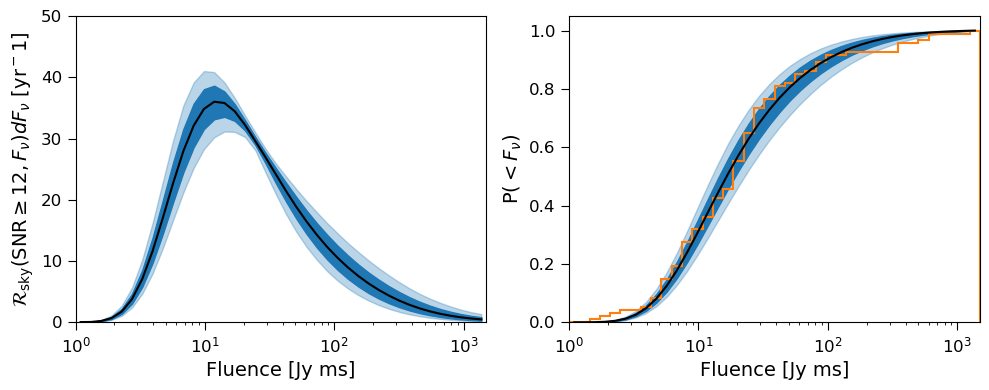

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].fill_between(x_points[2], flurange[1], flurange[3], color='C0', alpha=1)
ax[0].fill_between(x_points[2], flurange[0], flurange[4], color='C0', alpha=0.3)

ax[0].plot(x_points[2], flurange[2], color='k')

ax[0].set_xlim([1,1500])
ax[0].set_ylim([0, 50])
# ax.set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_xlabel("Fluence [Jy ms]", fontsize=14)
ax[0].set_ylabel(r"$\mathcal{R}_{\rm sky}({\rm SNR} \geq 12, F_{\nu}) dF_{\nu}$ [yr${^-1}$]", fontsize=14)
ax[0].tick_params(axis='both', which='major', length=6, labelsize=12)

fluences = cat2['fluence'][cat2_idx].values
hist_Fobs,_ = np.histogram(fluences, bins=x_param[2])

ax[1].fill_between(x_points[2], flucumrange[1], flucumrange[3], color='C0', alpha=1)
ax[1].fill_between(x_points[2], flucumrange[0], flucumrange[4], color='C0', alpha=0.3)
ax[1].hist(fluences, bins=x_param[2], histtype='step', color='C1', cumulative=True, density=True, lw=1.5)
ax[1].plot(x_points[2], flucumrange[2], color='k')
ax[1].set_xlim([1,1500])
ax[1].set_xscale('log')
ax[1].set_xlabel("Fluence [Jy ms]", fontsize=14)
ax[1].set_ylabel(r"P($<F_{\nu}$)", fontsize=14)
ax[1].tick_params(axis='both', which='major', length=6, labelsize=12)
plt.tight_layout()
plt.show()

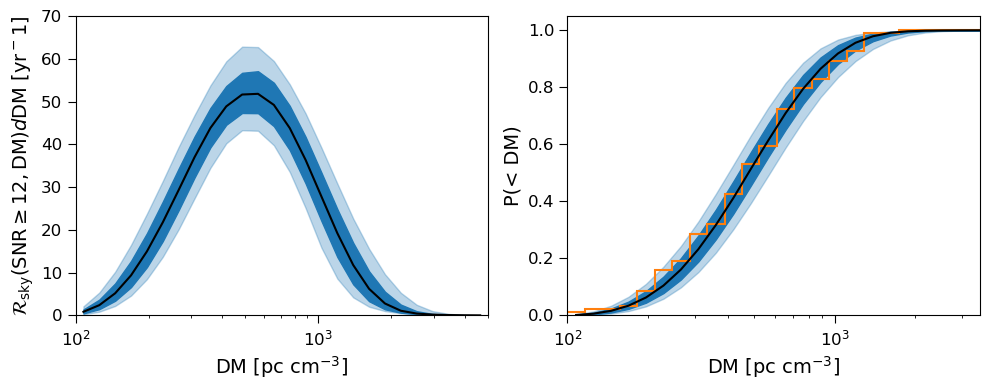

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
# uvlf_dpoints = ax.errorbar(magdata[idx_flag1], phidata[idx_flag1], yerr=phidata_err[:,idx_flag1], fmt=".k", capsize=2)
ax[0].fill_between(x_points[1], dmrange[1], dmrange[3], color='C0', alpha=1)
ax[0].fill_between(x_points[1], dmrange[0], dmrange[4], color='C0', alpha=0.3)

ax[0].plot(x_points[1], dmrange[2], color='k')

ax[0].set_xlim([100,5000])
ax[0].set_ylim([0, 70])
# ax.set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_xlabel(r"DM [pc cm$^{-3}$]", fontsize=14)
ax[0].set_ylabel(r"$\mathcal{R}_{\rm sky}({\rm SNR} \geq 12, {\rm DM}) d{\rm DM}$ [yr${^-1}$]", fontsize=14)
ax[0].tick_params(axis='both', which='major', length=6, labelsize=12)

# hist_dmobs,_ = np.histogram(dms_cat2, bins=x_param[1])
ax[1].fill_between(x_points[1], dmcumrange[1], dmcumrange[3], color='C0', alpha=1)
ax[1].fill_between(x_points[1], dmcumrange[0], dmcumrange[4], color='C0', alpha=0.3)
ax[1].hist(dms_cat2, bins=x_param[1], histtype='step', color='C1', cumulative=True, density=True, lw=1.5)
ax[1].plot(x_points[1], dmcumrange[2], color='k')

ax[1].set_xlim([100,3500])
# ax[1].set_ylim([0, 1])
ax[1].set_xscale('log')
ax[1].set_xlabel(r"DM [pc cm$^{-3}$]", fontsize=14)
ax[1].set_ylabel(r"P(< DM)", fontsize=14)
ax[1].tick_params(axis='both', which='major', length=6, labelsize=12)
plt.tight_layout()
plt.show()

### Get the all sky rate from SSH and CDT models

In [17]:
skyptile = np.percentile(np.sum(totrate1, axis=1), [16, 50, 84], axis=0)
q = np.diff(skyptile)/365
# lo1, hi1 = np.percentile(curves, (2.5, 97.5), axis=0)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}} \; day^{{-1}}"
# skyrate = np.sum(phi0*finrate(-1.4,-2.07,10**32.85,0.4, 5*jansky*1e-3, nu_obs, z, nu0_com=6e8))/365
txt = txt.format(skyptile[1]/365, q[0], q[1], "\mathcal{R}_{sky}")
display(Math(txt))
# print(np.sum(phi0*finrate(-1.4,-2.07,10**32.85,0.4, 5*jansky*1e-3, nu_obs, z, nu0_com=6e8))/365)

<IPython.core.display.Math object>

In [18]:
skyptile_delay = np.percentile(np.sum(totrate1_delay, axis=1), [16, 50, 84], axis=0)
q_delay = np.diff(skyptile_delay)/365
txt_delay = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}} \; day^{{-1}}"
txt_delay = txt_delay.format(skyptile_delay[1]/365, q_delay[0], q_delay[1], "\mathcal{R}_{sky}")
display(Math(txt_delay))

<IPython.core.display.Math object>

In [19]:
z = np.arange(0.005, 8, dz)
ind_file = np.load('data/ind_energy_agEf.npz')
ind_z = ind_file['ind_z']
ind_energy = ind_file['ind_energy']

In [20]:
nonrepeat_idx = []
repeat_fluidx = []
for idx, i in enumerate(cat1_idx):
    if cat1['repeater_name'][i] == '-9999':
        nonrepeat_idx.append(i)
    else:
        print(cat1['repeater_name'][i])
        repeat_fluidx.append(idx)

nonrepeat_ind_energy = np.zeros(len(nonrepeat_idx))
nonrepeat_ind_z = np.zeros(len(nonrepeat_idx))

counter = 0
for idx in range(len(cat1_idx)):
    if idx in repeat_fluidx:
        continue
    nonrepeat_ind_energy[counter] = ind_energy[idx]
    nonrepeat_ind_z[counter] = ind_z[idx]
    counter += 1

print("Repeater fluences = ", ind_energy[repeat_fluidx], "\nMost-likely repeater redshifts =", ind_z[repeat_fluidx])

FRB20190116B
FRB20190117A
FRB20190222A
Repeater fluences =  [3.08671287e+31 5.09912646e+31 3.50096839e+31] 
Most-likely repeater redshifts = [0.325 0.235 0.255]


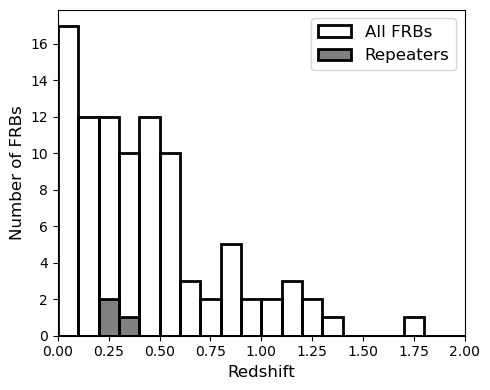

In [21]:
hist_indz,_ = np.histogram(ind_z, bins=np.linspace(0,2,21))
hist_nonrepeat_indz,_ = np.histogram(nonrepeat_ind_z, bins=np.linspace(0,2,21))
hist_repeat_indz,_ = np.histogram(ind_z[repeat_fluidx], bins=np.linspace(0,2,21))
hist_indEnu,_ = np.histogram(ind_energy, bins=np.logspace(26, 36, 11))
hist_nonrepeat_indEnu,_ = np.histogram(nonrepeat_ind_energy, bins=np.logspace(26, 36, 11))
hist_repeat_indEnu,_ = np.histogram(ind_energy[repeat_fluidx], bins=np.logspace(26, 36, 11))

fig, ax = plt.subplots(1,1, figsize=(5,4))
ax.hist(ind_z[repeat_fluidx], bins=np.linspace(0,2,21), facecolor='gray', edgecolor='black', linewidth=2, label='Repeaters')
ax.hist(ind_z, bins=np.linspace(0,2,21), facecolor='None', edgecolor='black', linewidth=2, label='All FRBs')
handles, labels = ax.get_legend_handles_labels()
ax.set_xlim([0,2])
ax.set_xlabel("Redshift", fontsize=12)
ax.set_ylabel("Number of FRBs", fontsize=12)
ax.legend(handles=[handles[1], handles[0]], labels=[labels[1], labels[0]], fontsize=12)
plt.tight_layout()
plt.show()

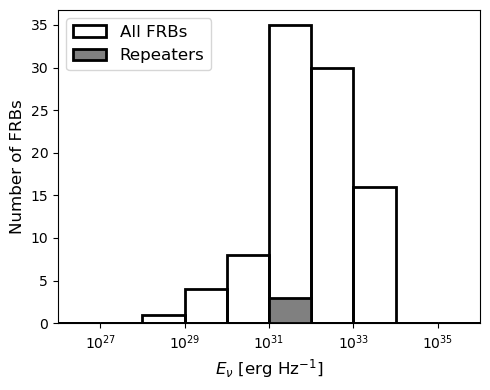

In [22]:
fig, ax = plt.subplots(1,1, figsize=(5,4))
ax.hist(ind_energy, bins=np.logspace(26, 36, 11), facecolor='None', edgecolor='black', linewidth=2, label="All FRBs")
ax.hist(ind_energy[repeat_fluidx], bins=np.logspace(26, 36, 11), facecolor='gray', edgecolor='black', linewidth=2, label="Repeaters")
handles, labels = ax.get_legend_handles_labels()
ax.set_xlabel(r"$E_{\nu}$ [erg Hz$^{-1}$]", fontsize=12)
ax.set_ylabel("Number of FRBs", fontsize=12)
ax.set_xscale('log')
ax.set_xlim([1e26, 1e36])
ax.legend(handles, labels, fontsize=12)
plt.tight_layout()
plt.show()